In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(15, 10))
import os
print(os.listdir("./input"))

import corner
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

['winequality-red.csv']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Data load and first impressions

In [2]:
#dataset read operation
#read_csv function is required to read the data.
file=pd.read_csv('./input/winequality-red.csv')
file.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#count of columns
len(file.columns)

12

In [4]:
# columns names
file.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
#count value of gender column
file['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
#to know the na values in each column
file.isna().sum() #no na values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#information about file
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
#median
file.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

In [9]:
#variance
file.var()

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
dtype: float64

In [10]:
#standard deviation
file.std()

fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64

In [11]:
#skewness (Schiefe; positiv ist rechtsschief wie Lognormal)
file.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [12]:
#kurtosis (Wölbung, Kyrtosis, Kurtosis oder auch Kurtose; ist eine Maßzahl für die Steilheit bzw. „Spitzigkeit“ einer (eingipfligen) Wahrscheinlichkeitsfunktion, statistischen Dichtefunktion oder Häufigkeitsverteilung
file.kurtosis()

fixed acidity            1.132143
volatile acidity         1.225542
citric acid             -0.788998
residual sugar          28.617595
chlorides               41.715787
free sulfur dioxide      2.023562
total sulfur dioxide     3.809824
density                  0.934079
pH                       0.806943
sulphates               11.720251
alcohol                  0.200029
quality                  0.296708
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF69716BE0>,
      dtype=object)

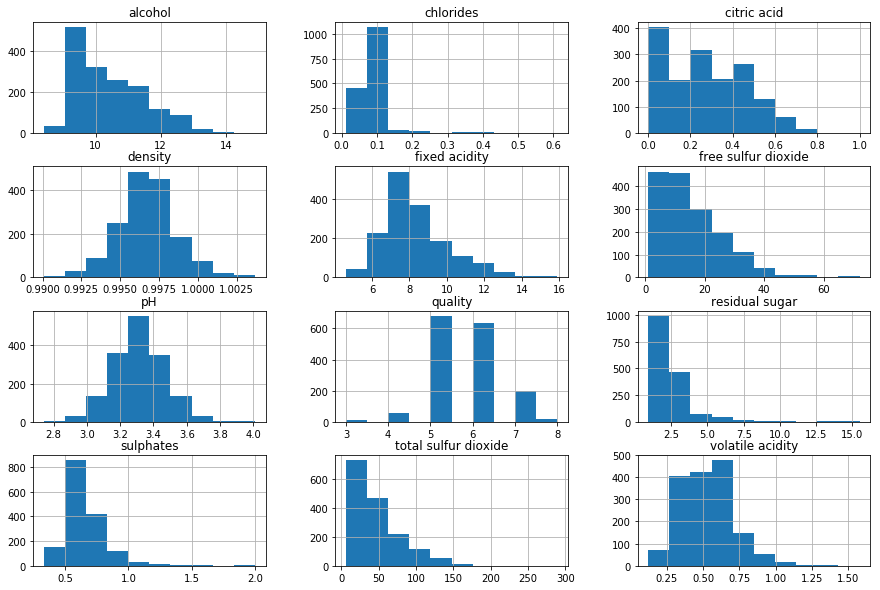

In [13]:
#Plot Histogram
file.hist(bins=10, figsize=(15,10))

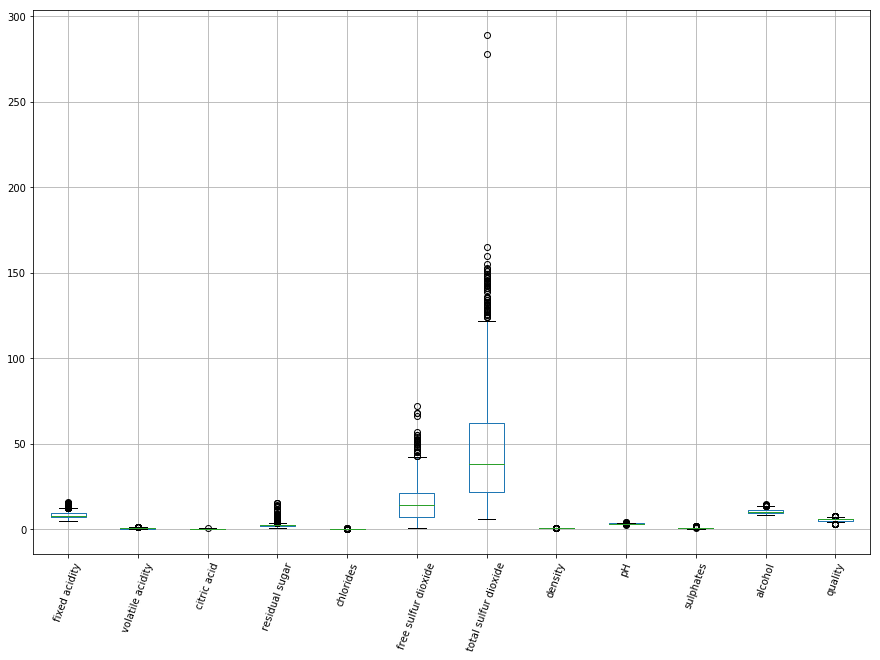

In [14]:
#boxplot
file.boxplot(figsize=(15,10),rot=70)

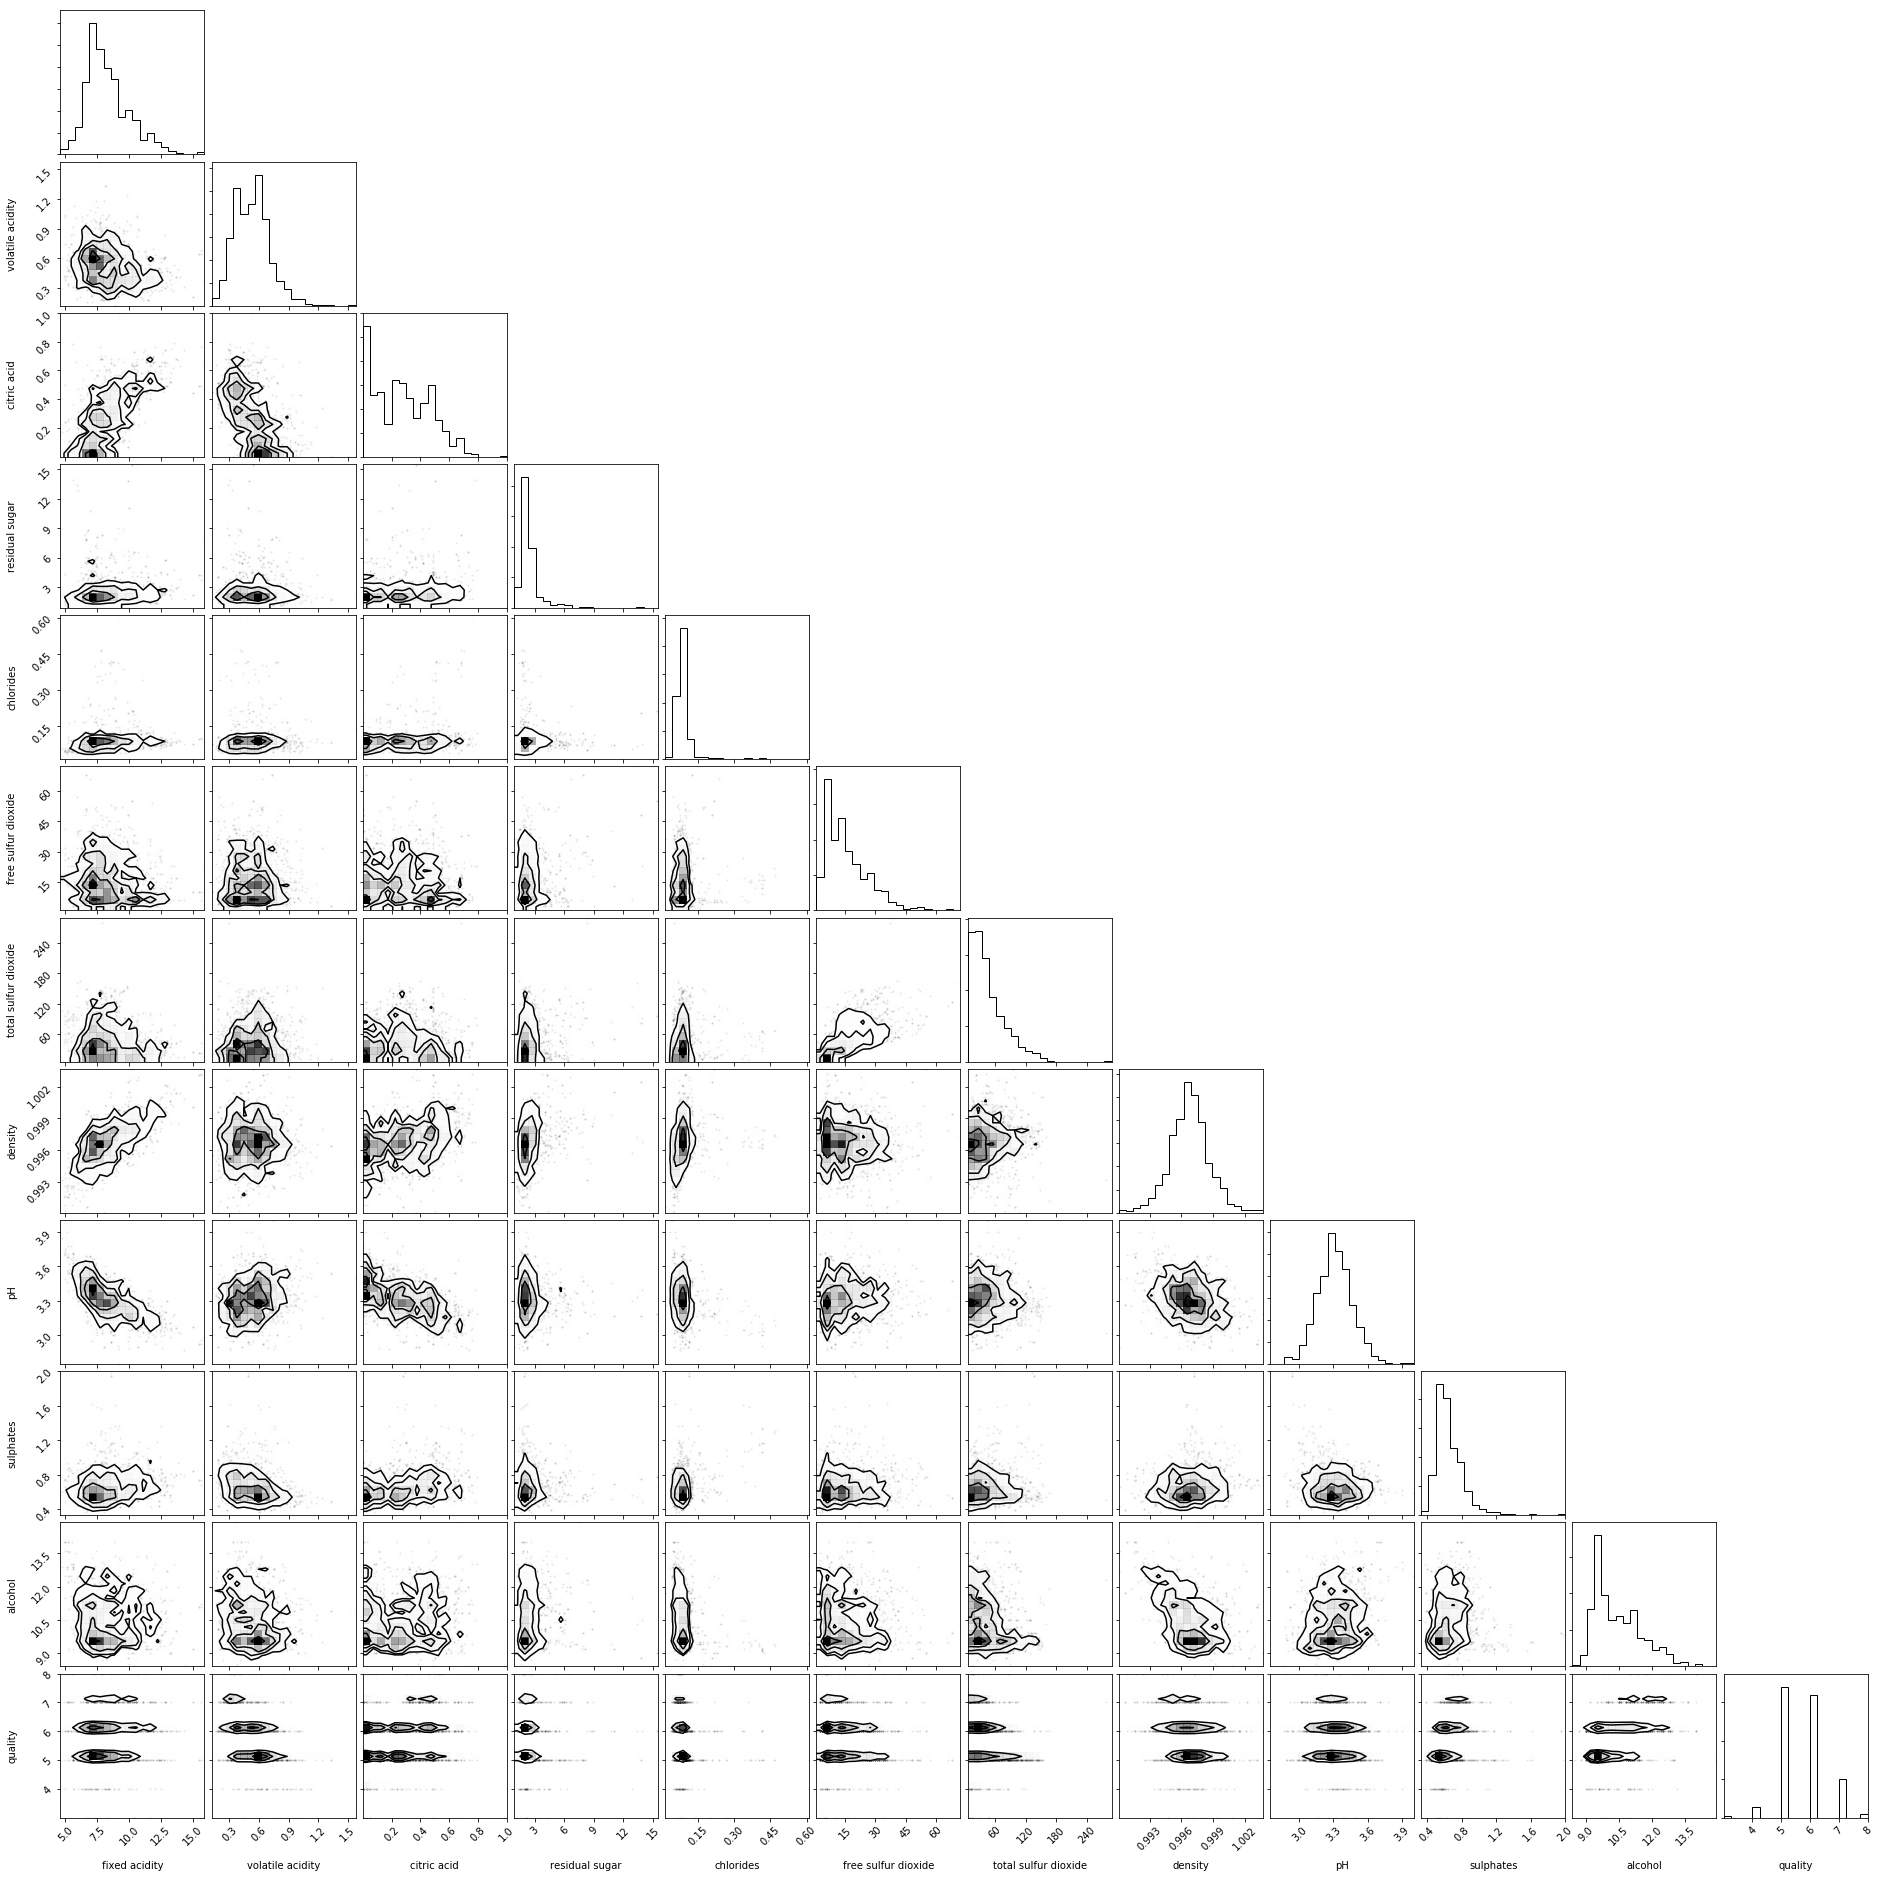

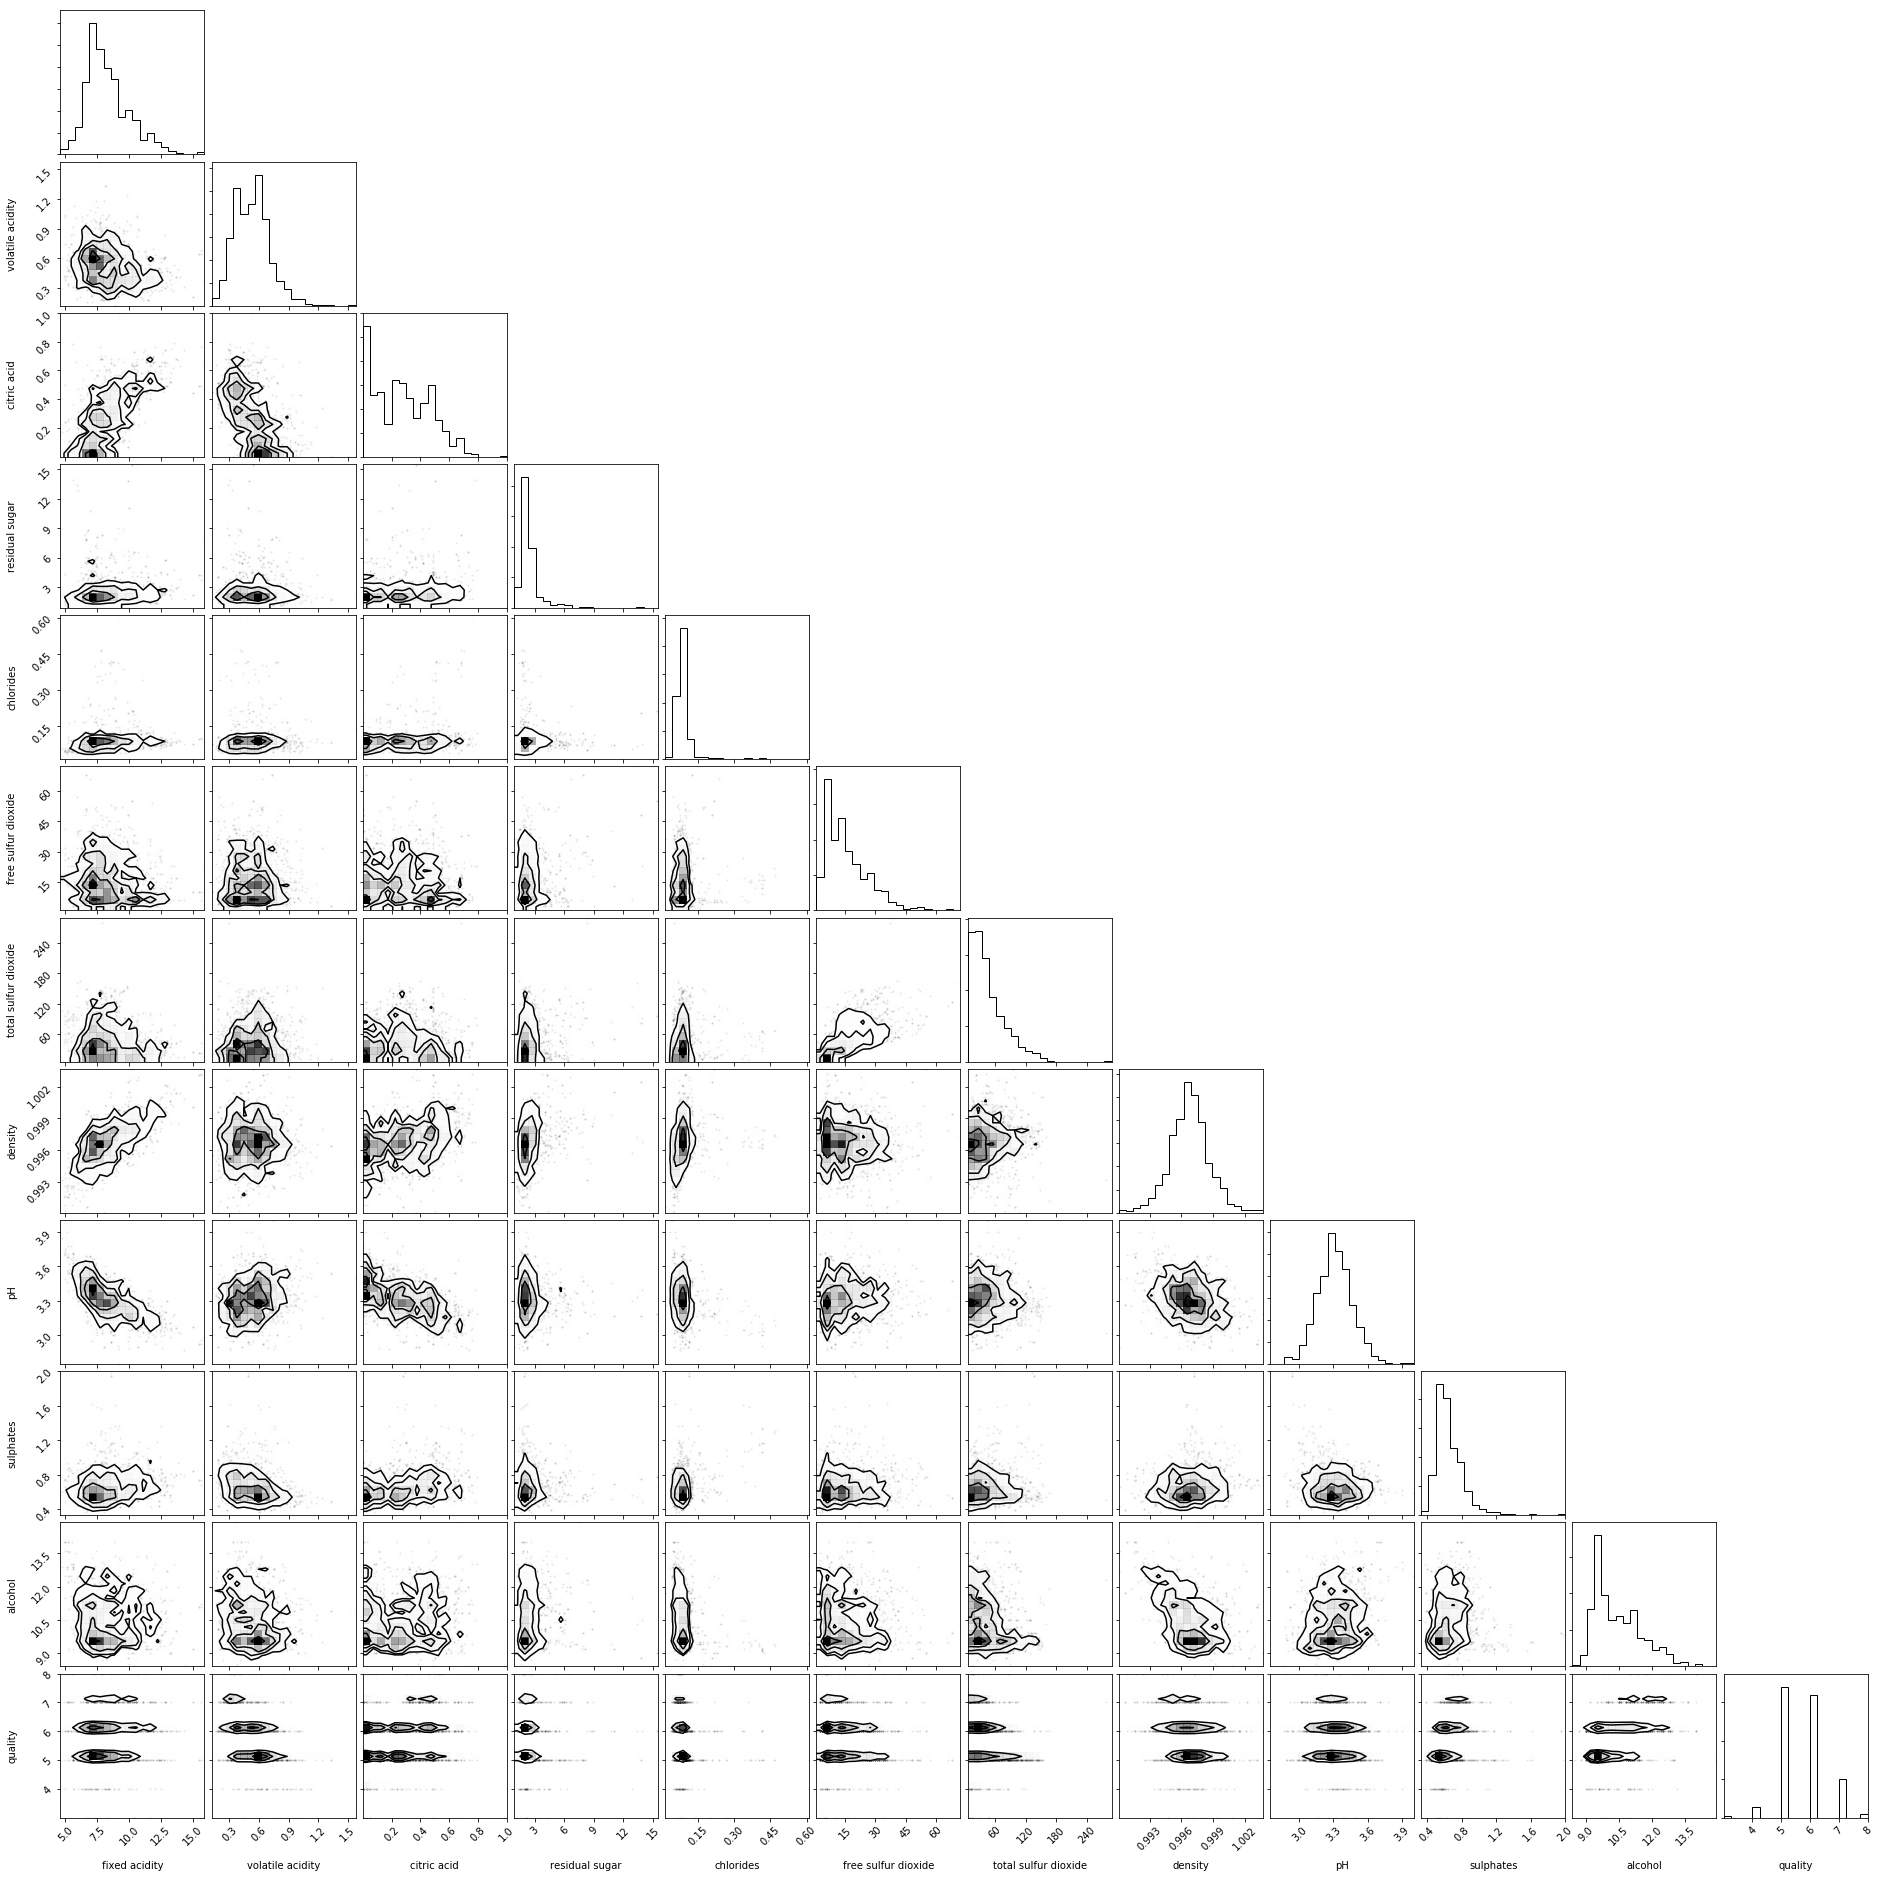

In [15]:
#corner plot
corner.corner(file)

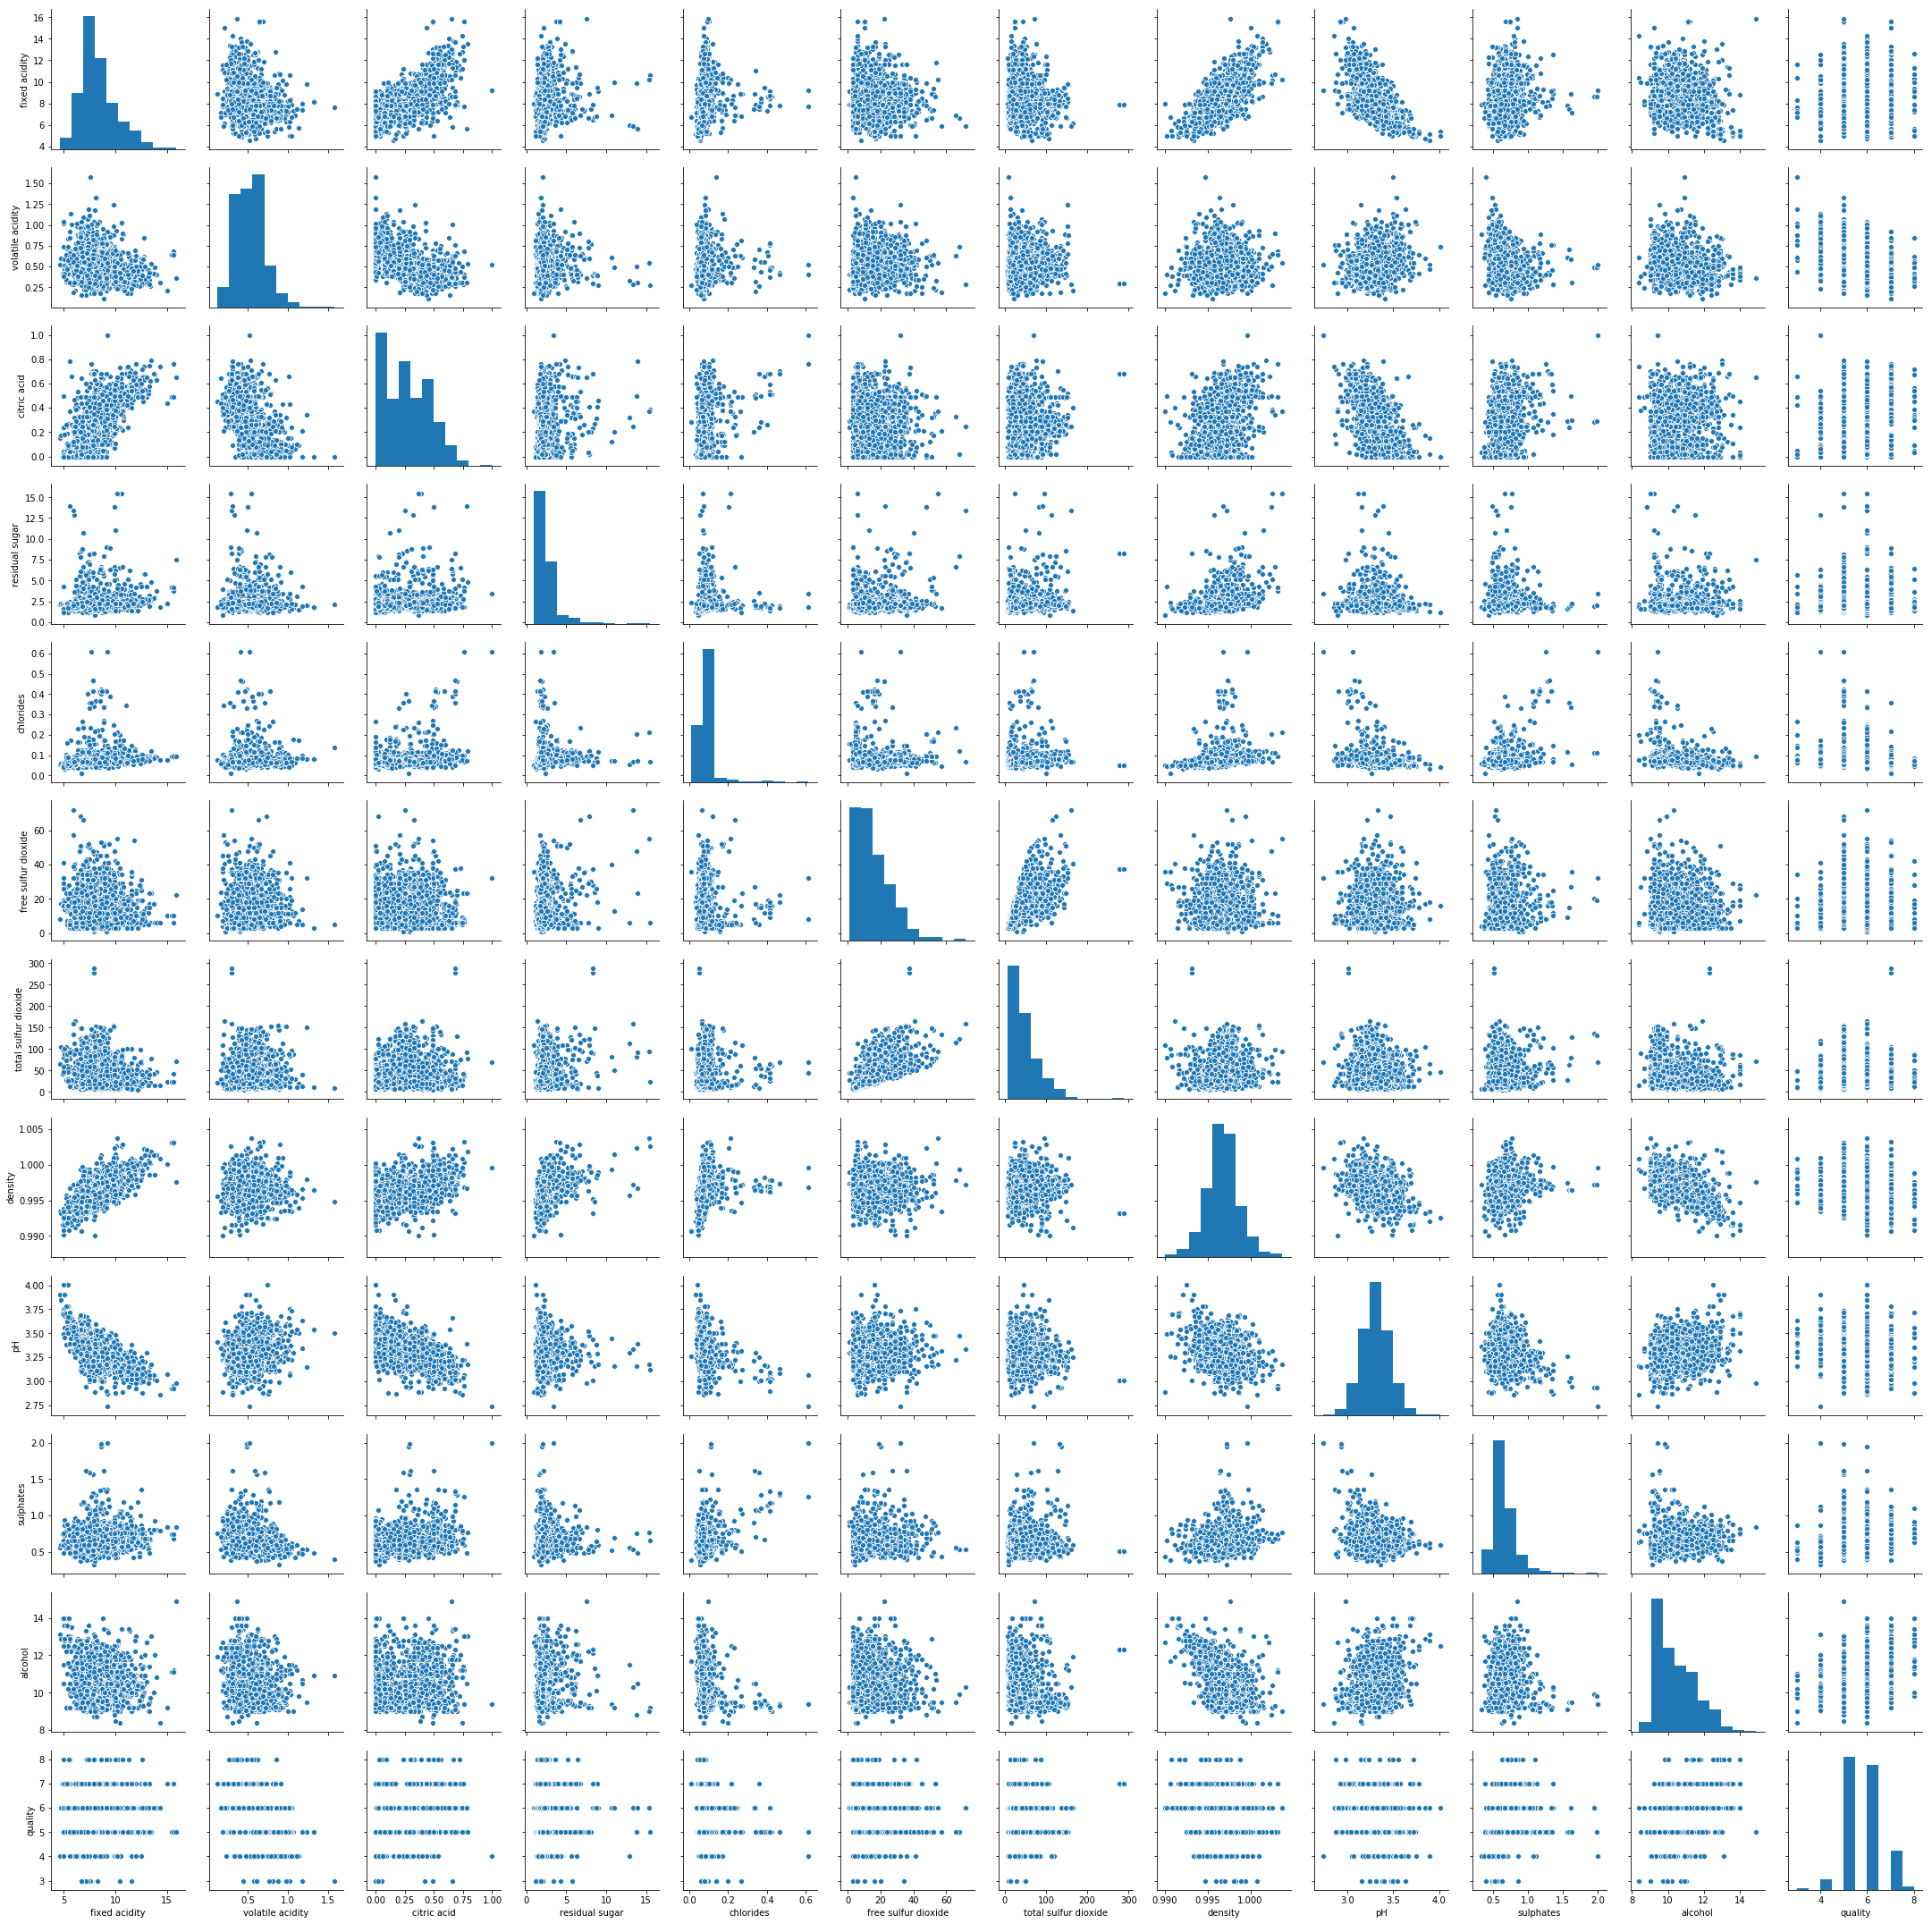

In [16]:
#scatter plot
sns.pairplot(file)

In [17]:
# Correlation matrix (for "quality" highest corr. is "alcohol" and highest anticorr. is "volatile acidity")
file.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


### Data preperation

In [18]:
#make two categories for quality
bins = (2,6.5,8)
group_names=['bad','good']
file['quality']=pd.cut(file['quality'],bins=bins,labels=group_names)

In [19]:
file.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad


In [20]:
#Correlation matrix 
file.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


In [21]:
# Consider the input varabile as X and Output variable as Y 
X = file[['fixed acidity','citric acid','residual sugar','sulphates','alcohol']]
Y = file[['quality']]
print(X.shape)
print(Y.shape)
print(X)
print(Y)

(1599, 5)
(1599, 1)
      fixed acidity  citric acid  residual sugar  sulphates  alcohol
0               7.4         0.00             1.9       0.56      9.4
1               7.8         0.00             2.6       0.68      9.8
2               7.8         0.04             2.3       0.65      9.8
3              11.2         0.56             1.9       0.58      9.8
4               7.4         0.00             1.9       0.56      9.4
5               7.4         0.00             1.8       0.56      9.4
6               7.9         0.06             1.6       0.46      9.4
7               7.3         0.00             1.2       0.47     10.0
8               7.8         0.02             2.0       0.57      9.5
9               7.5         0.36             6.1       0.80     10.5
10              6.7         0.08             1.8       0.54      9.2
11              7.5         0.36             6.1       0.80     10.5
12              5.6         0.00             1.6       0.52      9.9
13            

In [22]:
#normalize
norm=(X-X.min())/(X.max()-X.min())
norm
#other:
#from sklearn.preprocessing import StandardScaler (skaliert mit MW und STD)
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

,fixed acidity,citric acid,residual sugar,sulphates,alcohol
0,0.247788,0.00,0.068493,0.137725,0.153846
1,0.283186,0.00,0.116438,0.209581,0.215385
2,0.283186,0.04,0.095890,0.191617,0.215385
3,0.584071,0.56,0.068493,0.149701,0.215385
4,0.247788,0.00,0.068493,0.137725,0.153846
5,0.247788,0.00,0.061644,0.137725,0.153846
6,0.292035,0.06,0.047945,0.077844,0.153846
7,0.238938,0.00,0.020548,0.083832,0.246154
8,0.283186,0.02,0.075342,0.143713,0.169231
9,0.256637,0.36,0.356164,0.281437,0.323077


In [23]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [24]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [25]:
train_set, test_set = split_train_test(norm, 0.2)
print(len(train_set), "train +", len(test_set), "test")

1280 train + 319 test


In [26]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [27]:
norm_with_id = norm.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(norm_with_id, 0.2, "index")
train_set.head()

,index,fixed acidity,citric acid,residual sugar,sulphates,alcohol
0,0,0.247788,0.00,0.068493,0.137725,0.153846
1,1,0.283186,0.00,0.116438,0.209581,0.215385
2,2,0.283186,0.04,0.095890,0.191617,0.215385
3,3,0.584071,0.56,0.068493,0.149701,0.215385
6,6,0.292035,0.06,0.047945,0.077844,0.153846


In [28]:
#now take the scikit-learn stuff to split into training and test data
#first separate dataset as response variable and test variables
X = file.drop('quality', axis=1)
y = file['quality']

In [29]:
#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
print(len(X_train), "train +", len(X_test), "test")

1279 train + 320 test


In [30]:
#apply standart scaling to get optimized results
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Random forrest classifier

In [31]:
#RFC
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [32]:
#lets see how our model performs
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

             precision    recall  f1-score   support

        bad       0.92      0.96      0.94       273
       good       0.71      0.53      0.61        47

avg / total       0.89      0.90      0.89       320

[[263  10]
 [ 22  25]]
